In [2]:
import pandas as pd

In [4]:
# Load the data
df = pd.read_csv('used_cars_data.csv')

In [6]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
df.shape

(7253, 14)

In [10]:
# Step 1: Convert Seats to integers
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integer

## Part 1: Data cleaning

### 1.1 Remove the following columns: ‘S.No’ and ‘New_Price’.

In [14]:
# Remove 'S.No' and 'New_Price' columns
df = df.drop(['S.No.', 'New_Price'], axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74


### 1.2 create ‘Car_Age’ feature which is defined as the difference between the current year and the year the car was built. E.g. “Car_Age” for the first record is 14.

In [17]:
import datetime

In [19]:
# Create 'Car_Age' feature
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']

In [21]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74,11


### 1.3 There are two records for Electric vehicles. The corresponding mileage columns are empty. Please search internet what will be the reasonable value and fill out it. Please provide the logics with the reference.

#For Mahindra E Verito D4	, as it is EV, per full charge the vehical can travel 140km. and the battery capacity is 18.55 KWh. 
https://www.carwale.com/mahindra-cars/verito/e-d4-2016-2019/ 
carwale is the website where cars sell in india

#for Toyota Prius 2009-2016 Z4 , as it is hybrid car (electric and fuel type) based on the research the mileage for the car is 23.91kmpl. here am providing the reference. https://www.cardekho.com/toyota/prius-2009-2016 
WS

In [25]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5,12.75,13


In [27]:
# Set a mileage value for Mahindra E Verito D4 with unit
ev_mileage_value = '140 km/charge'  # in km per charge

# Fill the mileage for Mahindra E Verito D4 where it's missing
df.loc[(df['Name'] == 'Mahindra E Verito D4') & (df['Mileage'].isnull()), 'Mileage'] = ev_mileage_value

# Check the updated DataFrame
df[df['Name'] == 'Mahindra E Verito D4'] 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,140 km/charge,72 CC,41 bhp,5,13.0,8


In [29]:
# Set a mileage value for Toyota Prius 2009-2016 Z4 with unit
prius_mileage_value = '23.91 km/l'  # in km/l

# Fill the mileage for Toyota Prius where it's missing
df.loc[(df['Name'] == 'Toyota Prius 2009-2016 Z4') & (df['Mileage'].isnull()), 'Mileage'] = prius_mileage_value

# Check the updated DataFrame
df[df['Name'] == 'Toyota Prius 2009-2016 Z4']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,23.91 km/l,1798 CC,73 bhp,5,12.75,13


In [31]:
# Check the updated DataFrame
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,140 km/charge,72 CC,41 bhp,5,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,23.91 km/l,1798 CC,73 bhp,5,12.75,13


In [33]:
missing_values = df.isnull().sum()
missing_values

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                  53
Price                1234
Car_Age                 0
dtype: int64

## Part 2: Transformation

### 2.1 Among the columns in the dataset, the python datatype of the ‘Mileage’, ‘Engine’, and ‘Power’ columns are ‘object’. Please convert them to numerical datatype. Remove the unit and convert the string to a numerical value (floating point or integer)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   Int64  
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: Int64(1), float64(1), int64(3), object(8)
memory usage: 743.8+ KB


In [39]:
#  unique values in 'Mileage' column
print("Unique values in Mileage:")
print(df['Mileage'].unique())

# unique values in 'Engine' column
print("\nUnique values in Engine :")
print(df['Engine'].unique())

# unique values in 'Power' column
print("\nUnique values in Power :")
print(df['Power'].unique())

Unique values in Mileage:
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl' '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl'
 '12.4 kmpl' '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl'
 '11.74 kmpl' '22.07 kmpl' '19.7 kmpl' '25.4 kmpl' '25.32 kmpl'
 '14.62 kmpl' '14.28 kmpl' '14.9 kmpl' '11.25 kmpl' '24.4 kmpl'
 '16.55 kmpl' '17.11 kmpl' '22.9 kmpl' '17.8 kmpl' '18.9 kmpl'
 '15.04 kmpl' '25.17 kmpl' '20.36 kmpl' '13.29 kmpl' '13.68 kmpl'
 '20.0 kmpl' '15.8 kmpl' '25.0 kmpl' '16.4 kmpl' '24.52 kmpl' '22.1 kmpl'
 '8.5 kmpl' '15.1 kmpl' '16.95 kmpl' '19.64 kmpl' '16.5 kmpl' '18.53 kmpl'
 '17.57 kmpl' '18.0 kmpl' '23.2 kmpl' '16.73 kmpl' '17.0 kmpl' '13.0 kmpl'
 '17.68 kmpl' '22.7 kmpl' '16.2 kmpl

In [41]:
import numpy as np

In [43]:
# Function to extract the unit, with error handling
def extract_unit(value):
    if isinstance(value, str):
        # Split the string by space and return the last element
        return value.split()[-1]
    else:
        return np.nan  # Return NaN for non-string types

# Create temporary columns for units
df['Mileage_Unit'] = df['Mileage'].apply(extract_unit)
df['Engine_Unit'] = df['Engine'].apply(extract_unit)
df['Power_Unit'] = df['Power'].apply(extract_unit)

# Display the updated DataFrame
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit,Engine_Unit,Power_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75,14,km/kg,CC,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50,9,kmpl,CC,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50,13,kmpl,CC,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00,12,kmpl,CC,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74,11,kmpl,CC,bhp


In [45]:
# Calculate counts of each unique value in the unit columns
mileage_counts = df['Mileage_Unit'].value_counts()

# Display the counts
print("Mileage Counts:\n", mileage_counts)

Mileage Counts:
 Mileage_Unit
kmpl         7177
km/kg          74
km/charge       1
km/l            1
Name: count, dtype: int64


In [47]:
# Calculate counts of each unique value in the unit columns
engine_counts = df['Engine_Unit'].value_counts()

# Display the counts
print("\nEngine Counts:\n", engine_counts)


Engine Counts:
 Engine_Unit
CC    7207
Name: count, dtype: int64


In [49]:
# Calculate counts of each unique value in the unit columns
power_counts = df['Power_Unit'].value_counts()

# Display the counts
print("\nPower Counts:\n", power_counts)


Power Counts:
 Power_Unit
bhp    7207
Name: count, dtype: int64


In [51]:
# Function to extract the numeric value and unit from Mileage
def convert_mileage(value):
    if isinstance(value, str):
        number, unit = value.split()
        number = float(number)
        if unit == 'kmpl':
            return number  # Already in kmpl
        elif unit == 'km/kg':
            return number * 2.5  # Example conversion rate
        elif unit == 'km/l':
            return number  # km/l is equivalent to kmpl
        elif unit == 'km/charge':
            return number * 3.0  # Example conversion rate for km/charge
    return np.nan  # Handle non-string or NaN values

# Apply the conversion to the Mileage column
df['Mileage'] = df['Mileage'].apply(convert_mileage)

# Display the updated DataFrame
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit,Engine_Unit,Power_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,66.50,998 CC,58.16 bhp,5,1.75,14,km/kg,CC,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5,12.50,9,kmpl,CC,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5,4.50,13,kmpl,CC,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7,6.00,12,kmpl,CC,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5,17.74,11,kmpl,CC,bhp


In [53]:
import pandas as pd
import numpy as np 

# function to convert the units to dominant unit in power column
def power(power):
    if pd.isna(power) or 'null' in str(power):  # first checking for 'null' or missing values
        return np.nan
    if 'kW' in power:
        return float(power.replace(' kW', '')) * 1.341  # Convert kW to bhp using 1.341
    elif 'bhp' in power:
        return float(power.replace(' bhp', ''))  # Remove bhp unit and convert to float
    return np.nan

# function to convert the units to dominant unit in engine column
def engine(engine):
    if pd.isna(engine):
        return np.nan
    return float(engine.replace(' CC', ''))  # Remove 'CC' unit and convert to float

# Apply the cleaning functions to your dataset
df['Power'] = df['Power'].apply(power)
df['Engine'] = df['Engine'].apply(engine)

In [55]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit,Engine_Unit,Power_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,66.50,998.0,58.16,5,1.75,14,km/kg,CC,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,9,kmpl,CC,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,13,kmpl,CC,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,12,kmpl,CC,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,11,kmpl,CC,bhp


In [57]:
df[['Mileage', 'Engine', 'Power']].head()

,Mileage,Engine,Power
0,66.50,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80


In [59]:
df[['Mileage', 'Engine', 'Power']].dtypes

Mileage    float64
Engine     float64
Power      float64
dtype: object

In [61]:
# Dropping the temporary unit columns
df = df.drop(columns=['Mileage_Unit', 'Engine_Unit', 'Power_Unit'])

# Display the updated DataFrame
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,66.5,998.0,58.16,5,1.75,14


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   Int64  
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: Int64(1), float64(4), int64(3), object(5)
memory usage: 743.8+ KB


In [65]:
# Check for any remaining non-numeric values
for col in ['Mileage', 'Engine', 'Power']:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()]
    print(f"\nNon-numeric values in {col}:")
    print(non_numeric[col].unique())


Non-numeric values in Mileage:
[]

Non-numeric values in Engine:
[]

Non-numeric values in Power:
[]


## Part 3: Outlier detection and box-plot

### 3.1 Please check whether the data is in the normal distribution or non-normal distribution for the following numerical columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’

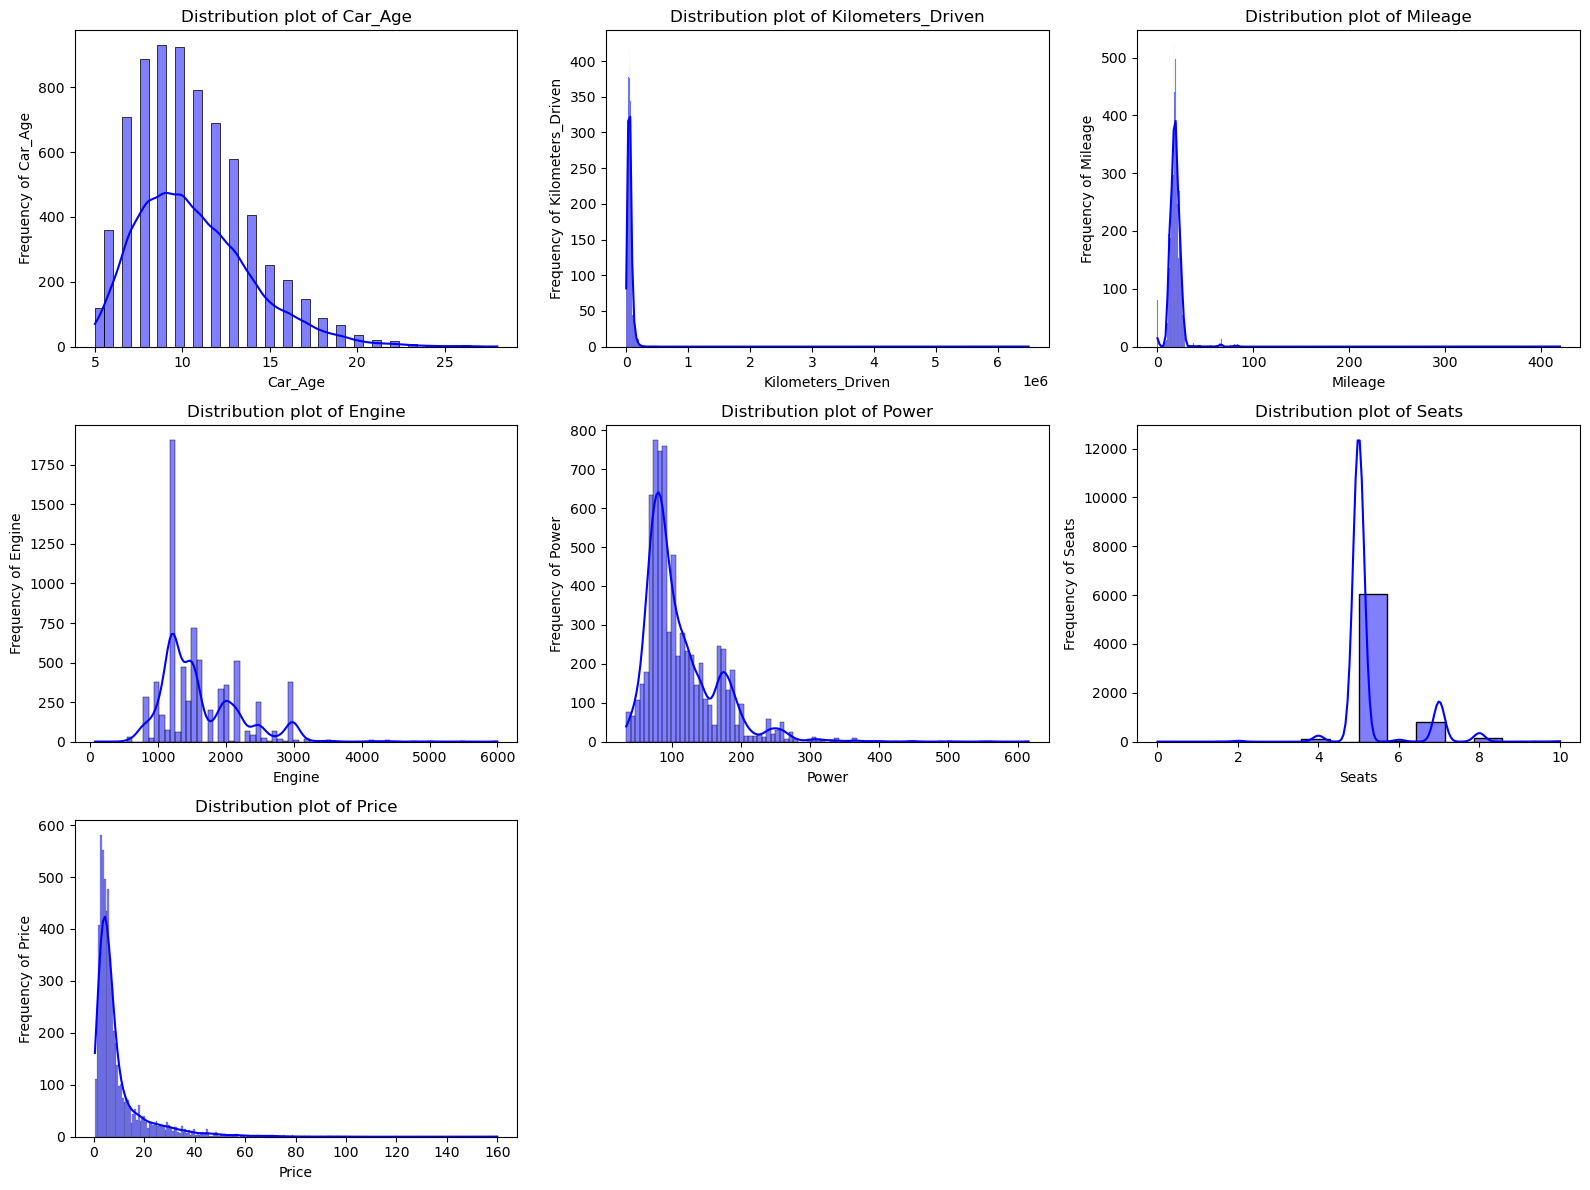

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creating list for numerical columns
numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

plt.figure(figsize=(16, 12))

# for loop to iterate num columns and plot the graph to check distribution
for i, col in enumerate(numerical_columns, start = 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde = True, color = 'blue')
    plt.title(f'Distribution plot of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Frequency of {col}')

plt.tight_layout()
plt.show()

1. car age distribution is not normal distribution. this is right skewed. 
2. kilometer_driven also have non normal distribution. 
3. Mileage shows partial normal distribution as it is not perfrct bell shaped curve. 
4. all the other plots like for engine, power, seats, price they are not normal distributions. 

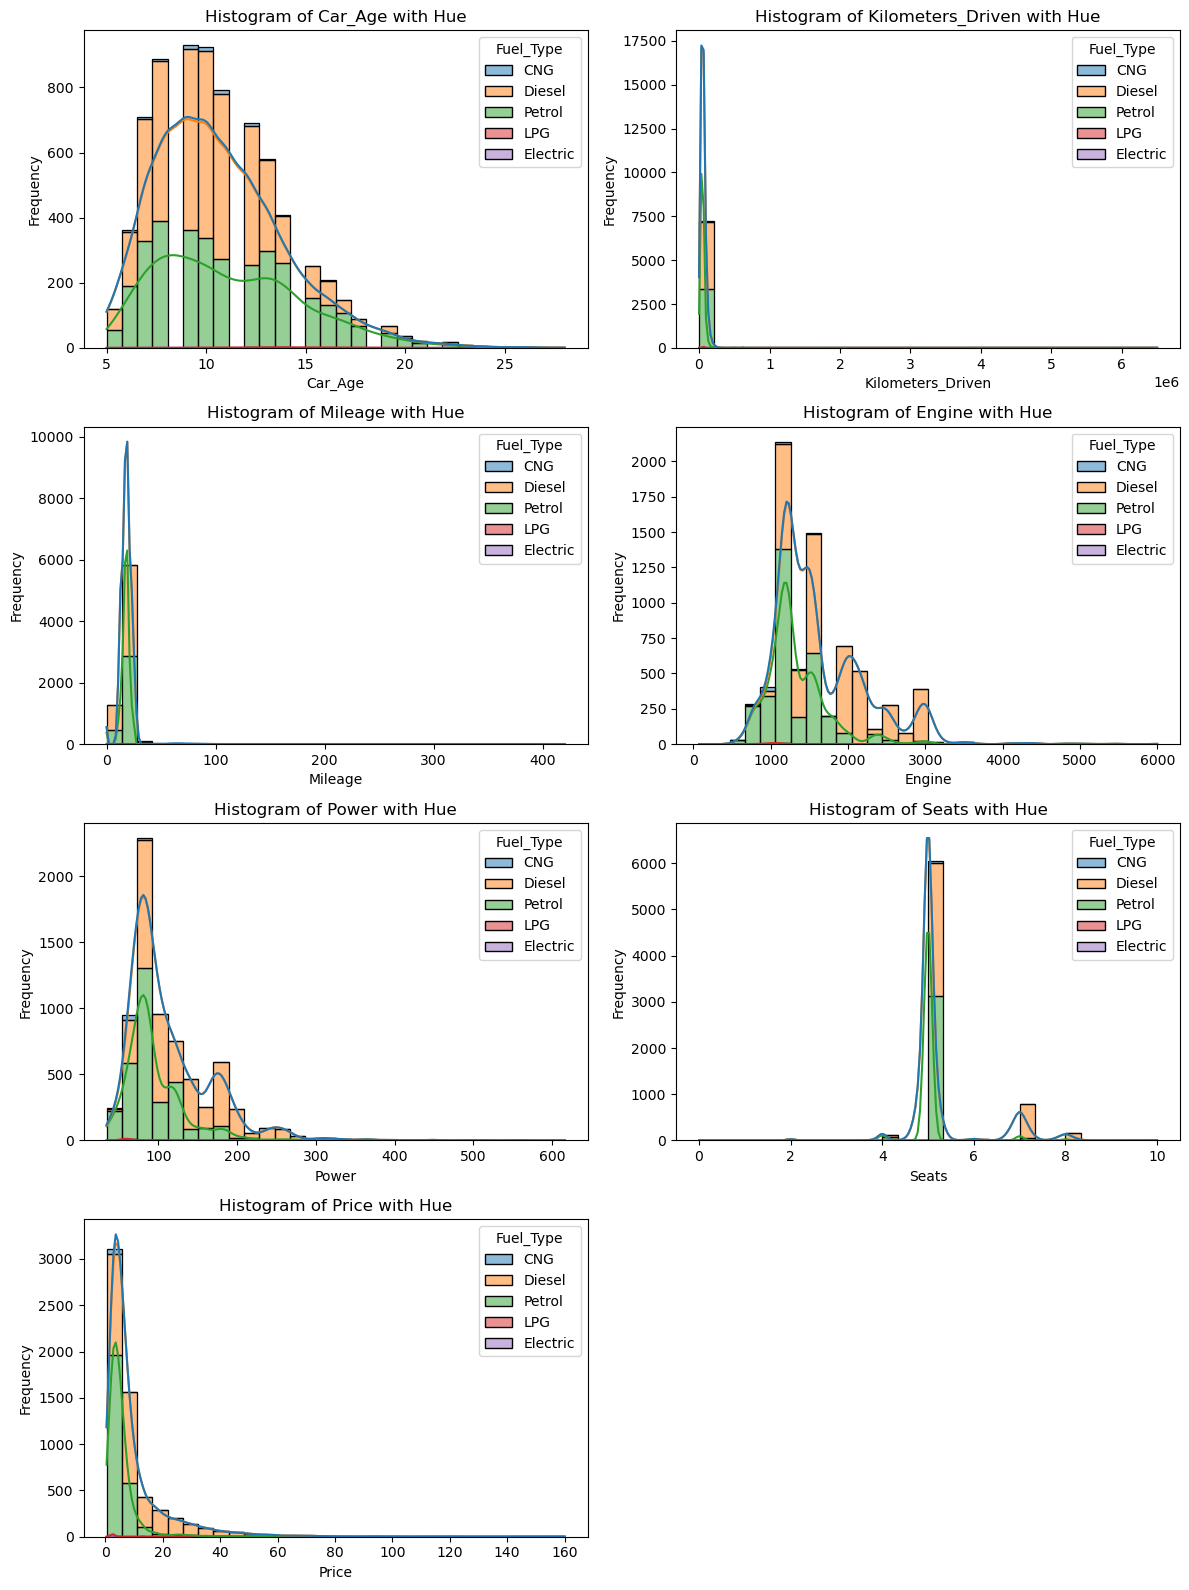

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Numerical columns to check
numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


hue_column = 'Fuel_Type'  

# Create a figure to hold the plots
plt.figure(figsize=(12, 16))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)  # Adjust the subplot grid as needed
    sns.histplot(data=df, x=column, hue=hue_column, bins=30, kde=True, multiple='stack')
    plt.title(f'Histogram of {column} with Hue')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [79]:
# Check for normality using Shapiro-Wilk test
print("Shapiro-Wilk Test Results:")
for column in numerical_columns:
    stat, p_value = stats.shapiro(df[column].dropna())  # Drop NaN values for the test
    print(f"{column}: Statistics={stat:.3f}, p-value={p_value:.3f}")
    alpha = 0.05
    if p_value > alpha:
        print(f" -> {column} looks like a normal distribution (fail to reject H0)")
    else:
        print(f" -> {column} does not look like a normal distribution (reject H0)")

Shapiro-Wilk Test Results:
Car_Age: Statistics=0.951, p-value=0.000
 -> Car_Age does not look like a normal distribution (reject H0)
Kilometers_Driven: Statistics=0.195, p-value=0.000
 -> Kilometers_Driven does not look like a normal distribution (reject H0)
Mileage: Statistics=0.504, p-value=0.000
 -> Mileage does not look like a normal distribution (reject H0)
Engine: Statistics=0.880, p-value=0.000
 -> Engine does not look like a normal distribution (reject H0)
Power: Statistics=0.842, p-value=0.000
 -> Power does not look like a normal distribution (reject H0)
Seats: Statistics=0.498, p-value=0.000
 -> Seats does not look like a normal distribution (reject H0)
Price: Statistics=0.641, p-value=0.000
 -> Price does not look like a normal distribution (reject H0)


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7253.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7207.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7078.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7200.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: Use

### 3.2 Please detect outliers based on the data distribution type. For outlier detection, please calculate step by step. Please count(print) how many outliers for each column. 

In [81]:
# Initialize a dictionary to store outlier counts
outlier_counts = {}

# Detect outliers using the IQR method
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    outlier_counts[column] = outlier_count

# Print the number of outliers for each column
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

Car_Age: 58 outliers
Kilometers_Driven: 258 outliers
Mileage: 156 outliers
Engine: 65 outliers
Power: 273 outliers
Seats: 1153 outliers
Price: 718 outliers


#### Car_Age

In [84]:
# Calculate Q1, Q3, and IQR for the Car_Age column
Q1 = df['Car_Age'].quantile(0.25)  # First quartile
Q3 = df['Car_Age'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Car_Age'] < lower_bound]
upper_bound_outliers = df[df['Car_Age'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Car_Age'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Car_Age'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Car_Age'])

Total outliers in 'Car_Age': 58
Lower bound outliers count: 0
Upper bound outliers count: 58

Lower bound outliers:
Series([], Name: Car_Age, dtype: int64)

Upper bound outliers:
274     22
315     24
364     21
613     24
631     22
911     21
1221    21
1224    25
1318    22
1845    25
1903    22
1907    22
1999    23
2487    21
2524    21
2554    22
2656    22
2737    23
3138    26
3189    22
3221    22
3228    21
3749    26
3806    23
3854    21
3942    22
3963    23
4143    21
4152    21
4351    21
4629    23
4658    21
4709    26
4712    21
4730    21
4791    21
4822    22
4863    23
5040    21
5137    24
5270    22
5432    22
5453    23
5643    21
5647    23
5657    22
5716    26
5914    21
5926    24
5943    22
6194    21
6216    28
6454    22
6576    22
6753    24
6875    22
6986    21
7138    21
Name: Car_Age, dtype: int64


#### Kilometers_Driven

In [87]:
# Calculate Q1, Q3, and IQR for the Kilometers_Driven column
Q1 = df['Kilometers_Driven'].quantile(0.25)  # First quartile
Q3 = df['Kilometers_Driven'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Kilometers_Driven'] < lower_bound]
upper_bound_outliers = df[df['Kilometers_Driven'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Kilometers_Driven'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Kilometers_Driven'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Kilometers_Driven'])

Total outliers in 'Kilometers_Driven': 258
Lower bound outliers count: 0
Upper bound outliers count: 258

Lower bound outliers:
Series([], Name: Kilometers_Driven, dtype: int64)

Upper bound outliers:
29      262000
64      178000
77      230000
154     136997
164     147898
         ...  
7183    137711
7198    147202
7200    190000
7213    170000
7227    160000
Name: Kilometers_Driven, Length: 258, dtype: int64


#### Mileage

In [90]:
# Calculate Q1, Q3, and IQR for the Mileage column
Q1 = df['Mileage'].quantile(0.25)  # First quartile
Q3 = df['Mileage'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Mileage'] < lower_bound]
upper_bound_outliers = df[df['Mileage'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Mileage'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Mileage'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Mileage'])

Total outliers in 'Mileage': 156
Lower bound outliers count: 82
Upper bound outliers count: 74

Lower bound outliers:
14      0.0
67      0.0
79      0.0
194     0.0
229     0.0
       ... 
6633    0.0
6697    0.0
6857    0.0
6957    0.0
7226    0.0
Name: Mileage, Length: 82, dtype: float64

Upper bound outliers:
0       66.50
5       52.75
127     66.50
328     65.75
440     37.75
        ...  
6538    80.65
6788    80.65
6918    33.00
6926    37.75
6958    76.15
Name: Mileage, Length: 74, dtype: float64


#### Engine

In [93]:
# Calculate Q1, Q3, and IQR for the Engine column
Q1 = df['Engine'].quantile(0.25)  # First quartile
Q3 = df['Engine'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Engine'] < lower_bound]
upper_bound_outliers = df[df['Engine'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Engine'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Engine'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Engine'])

Total outliers in 'Engine': 65
Lower bound outliers count: 0
Upper bound outliers count: 65

Lower bound outliers:
Series([], Name: Engine, dtype: float64)

Upper bound outliers:
70      4806.0
152     5461.0
459     4134.0
586     4134.0
589     3498.0
         ...  
6011    3597.0
6186    3498.0
6354    5998.0
6842    3696.0
7057    4395.0
Name: Engine, Length: 65, dtype: float64


#### Power

In [96]:
# Calculate Q1, Q3, and IQR for the Power column
Q1 = df['Power'].quantile(0.25)  # First quartile
Q3 = df['Power'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Power'] < lower_bound]
upper_bound_outliers = df[df['Power'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Power'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Power'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Power'])

Total outliers in 'Power': 273
Lower bound outliers count: 0
Upper bound outliers count: 273

Lower bound outliers:
Series([], Name: Power, dtype: float64)

Upper bound outliers:
38      254.80
70      500.00
103     241.40
107     270.90
134     362.07
         ...  
7117    360.00
7124    236.00
7156    321.00
7198    241.60
7216    258.00
Name: Power, Length: 273, dtype: float64


#### Seats

In [99]:
# Calculate Q1, Q3, and IQR for the Seats column
Q1 = df['Seats'].quantile(0.25)  # First quartile
Q3 = df['Seats'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Seats'] < lower_bound]
upper_bound_outliers = df[df['Seats'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Seats'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Seats'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Seats'])

Total outliers in 'Seats': 1153
Lower bound outliers count: 138
Upper bound outliers count: 1015

Lower bound outliers:
41      4
112     4
124     4
134     2
148     4
       ..
6906    4
6960    2
7057    4
7102    4
7194    4
Name: Seats, Length: 138, dtype: Int64

Upper bound outliers:
3       7
7       8
15      7
29      7
32      7
       ..
7169    7
7175    7
7198    7
7206    7
7223    7
Name: Seats, Length: 1015, dtype: Int64


#### Price

In [102]:
# Calculate Q1, Q3, and IQR for the Price column
Q1 = df['Price'].quantile(0.25)  # First quartile
Q3 = df['Price'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
lower_bound_outliers = df[df['Price'] < lower_bound]
upper_bound_outliers = df[df['Price'] > upper_bound]

# Count outliers
total_outliers = len(lower_bound_outliers) + len(upper_bound_outliers)
lower_outlier_count = len(lower_bound_outliers)
upper_outlier_count = len(upper_bound_outliers)

# Print results
print(f"Total outliers in '{'Price'}': {total_outliers}")
print(f"Lower bound outliers count: {lower_outlier_count}")
print(f"Upper bound outliers count: {upper_outlier_count}")

print("\nLower bound outliers:")
print(lower_bound_outliers['Price'])

print("\nUpper bound outliers:")
print(upper_bound_outliers['Price'])

Total outliers in 'Price': 718
Lower bound outliers count: 0
Upper bound outliers count: 718

Lower bound outliers:
Series([], Name: Price, dtype: float64)

Upper bound outliers:
13      27.00
19      28.00
22      23.50
38      28.00
50      21.43
        ...  
5950    21.75
5970    26.76
5996    30.54
6008    45.00
6009    19.75
Name: Price, Length: 718, dtype: float64


### 3.3 Please draw box-plot for the columns. Please draw box-plot together if the scales of the columns are in similar range. Otherwise, please draw box-plot separately.

Car_Age:
   Range : 23
   Shapiro-Wilk Test: Statistic=0.9507486821938141, p-value=5.781548453740063e-44
   Not Normal distribution


Kilometers_Driven:
   Range : 6499829
   Shapiro-Wilk Test: Statistic=0.19456631009943626, p-value=1.04930962470592e-100
   Not Normal distribution


Mileage:
   Range : 420.0
   Shapiro-Wilk Test: Statistic=0.5038674795505882, p-value=3.6749710612504475e-89
   Not Normal distribution


Engine:
   Range : 5926.0
   Shapiro-Wilk Test: Statistic=0.8797719301033762, p-value=2.2511563855513208e-59
   Not Normal distribution


Power:
   Range : 581.8
   Shapiro-Wilk Test: Statistic=0.8419137509737623, p-value=3.0373159343940697e-64
   Not Normal distribution


Seats:
   Range : 10
   Shapiro-Wilk Test: Statistic=0.498449071258353, p-value=3.160993759732639e-89
   Not Normal distribution


Price:
   Range : 159.56
   Shapiro-Wilk Test: Statistic=0.6406859757274896, p-value=1.8804936208528862e-77
   Not Normal distribution




/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7253.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7207.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7078.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7200.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: Use

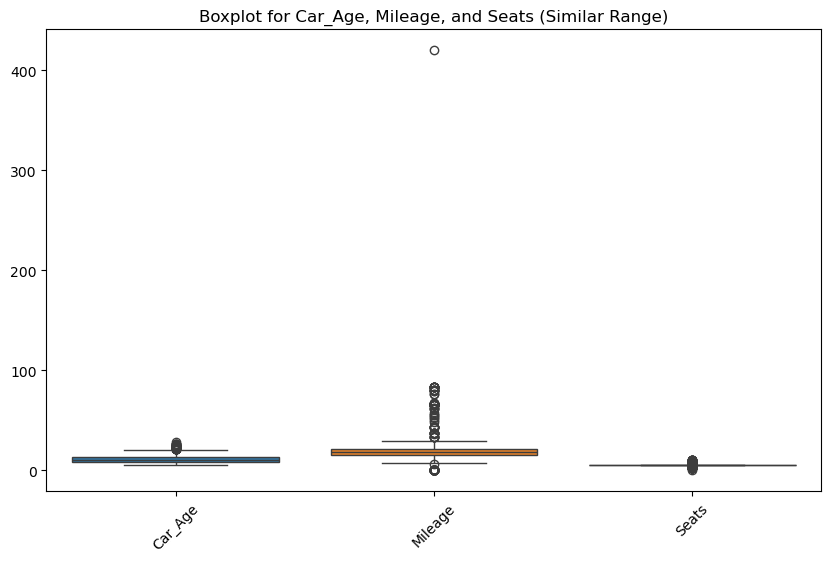

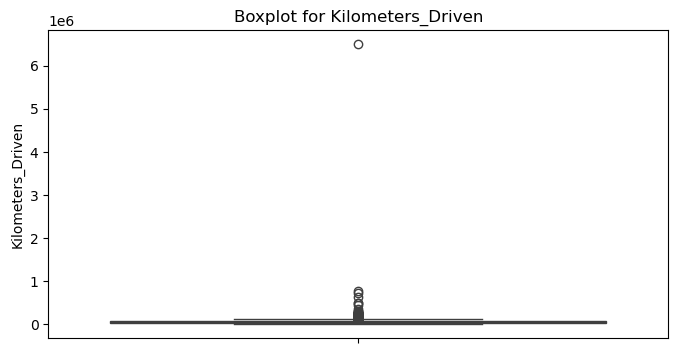

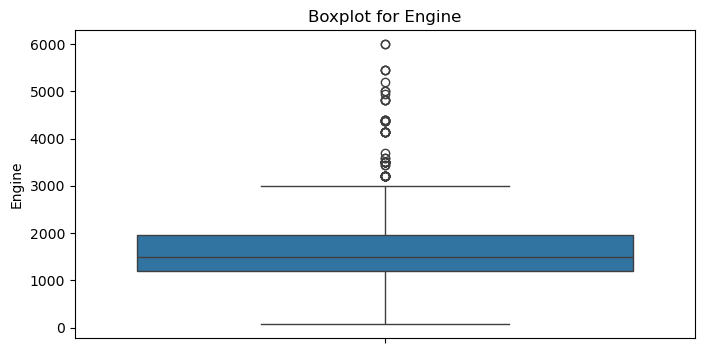

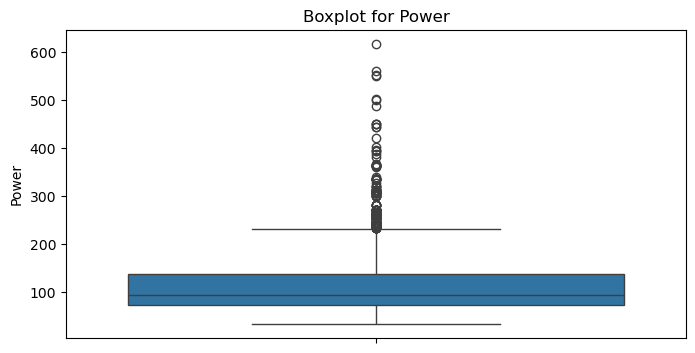

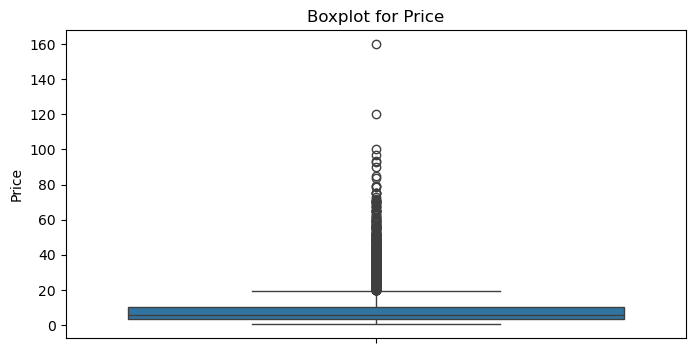

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# 1. Calculating the range for each column and performing the Shapiro-Wilk test
for col in numerical_columns:
    range = df[col].max() - df[col].min()
    stat, p_value = shapiro(df[col].dropna())
    
    print(f"{col}:")
    print(f"   Range : {range}")
    print(f"   Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
    print(f"   {'Normal distribution' if p_value > 0.05 else 'Not Normal distribution'}")
    print("\n")

# based on range and distribution, splitting the columns for box plot.

# 1: box plot together for Car_Age, Mileage, Seats columns 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Car_Age', 'Mileage', 'Seats']])
plt.title("Boxplot for Car_Age, Mileage, and Seats (Similar Range)")
plt.xticks(rotation=45)
plt.show()

# 2:box plots separately due to larger scales for columns Kilometers_Driven, Engine, Power, Price
for col in ['Kilometers_Driven', 'Engine', 'Power', 'Price']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

Ranges of the columns:
Car_Age: Min = 5, Max = 28
Kilometers_Driven: Min = 171, Max = 6500000
Mileage: Min = 0.0, Max = 420.0
Engine: Min = 72.0, Max = 5998.0
Power: Min = 34.2, Max = 616.0
Seats: Min = 0, Max = 10
Price: Min = 0.44, Max = 160.0


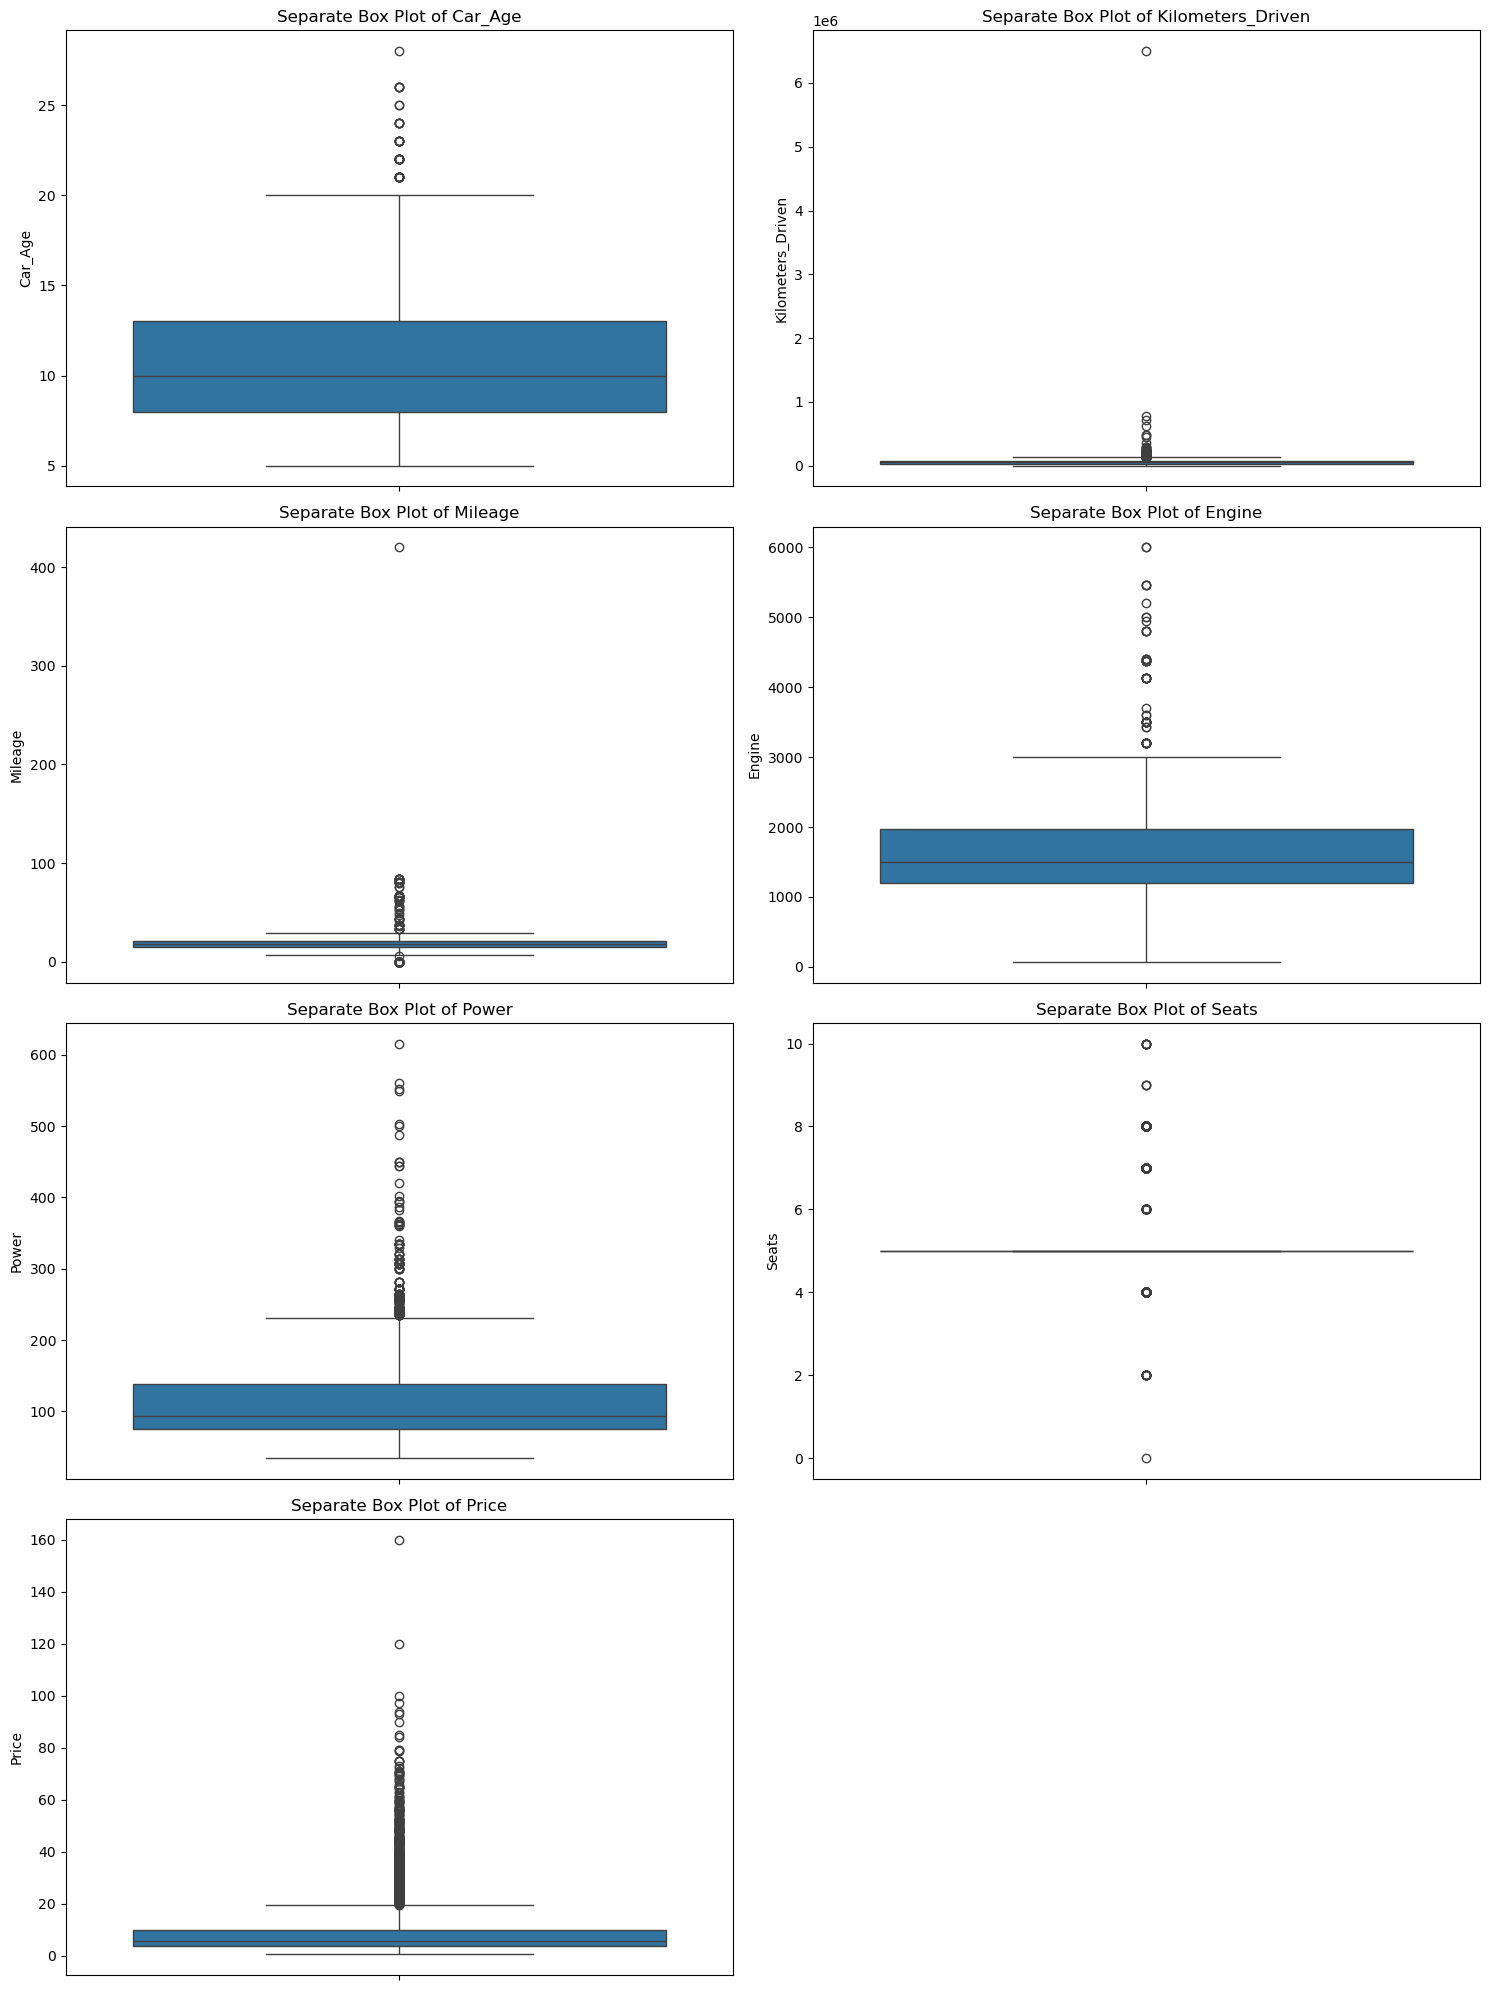

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns to plot
numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Check the range of the columns
ranges = {column: (df[column].min(), df[column].max()) for column in numerical_columns}
print("Ranges of the columns:")
for column, (min_val, max_val) in ranges.items():
    print(f"{column}: Min = {min_val}, Max = {max_val}")

# Define a threshold for plotting together or separately
threshold = 10000  # Adjust this value as needed

# Check if any of the columns have a wide range and should be plotted separately
scale_variation = [max_val - min_val for min_val, max_val in ranges.values()]
if any(scale > threshold for scale in scale_variation):
    # Plotting separately
    plt.figure(figsize=(15, 20))
    for i, column in enumerate(numerical_columns):
        plt.subplot(4, 2, i + 1)  # Adjust the subplot grid as needed
        sns.boxplot(data=df, y=column)
        plt.title(f'Separate Box Plot of {column}')
        plt.ylabel(column)

    plt.tight_layout()
    plt.show()
else:
    # Plotting together
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[numerical_columns])
    plt.title('Combined Box Plot of Numerical Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3.4 draw box-plot for ‘Mileage’ with ‘Fuel_Type’.

/var/folders/mz/l3lbw4h95l36t184_ybct9vr0000gn/T/ipykernel_23677/3445132013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel_Type', y='Mileage', palette='Set2')


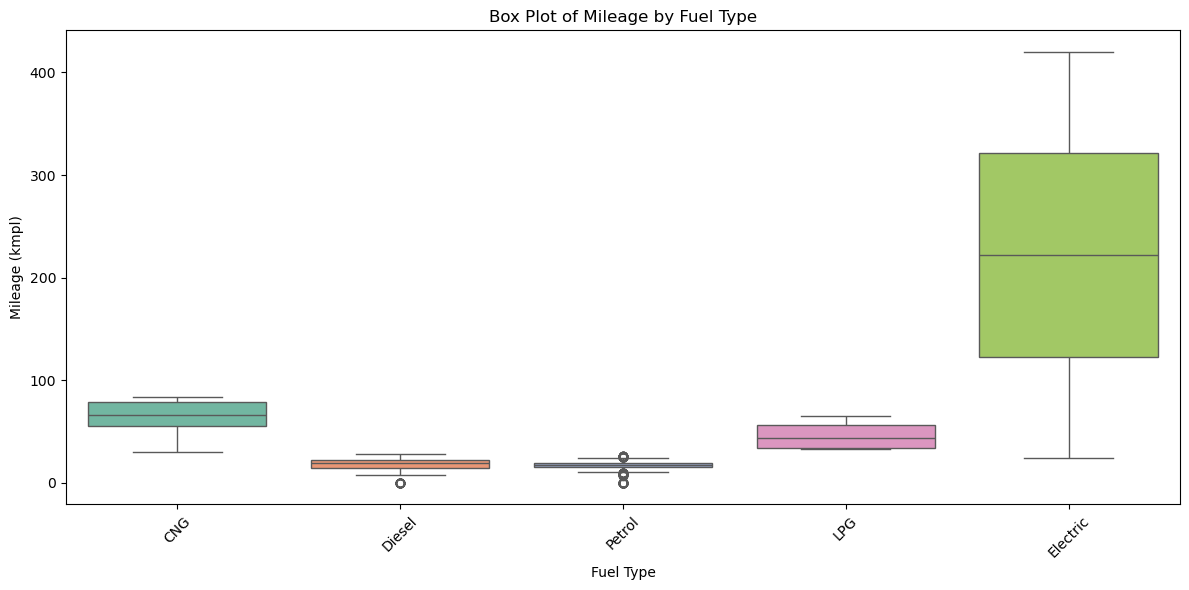

In [110]:
# Create a box plot for Mileage with Fuel_Type as hue
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Fuel_Type', y='Mileage', palette='Set2')
plt.title('Box Plot of Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (kmpl)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part 4. Pearson correlation coefficient and scatter plot

#### 4.1 Please calculate Pearson correlation coefficient between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’.

In [112]:
df.shape

(7253, 13)

In [114]:
import pandas as pd

# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    # Return the DataFrame with outliers removed
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns to check for outliers
columns_to_check = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Remove outliers for each column
for column in columns_to_check:
    df_filtered = remove_outliers(df, column)

# Optionally, print the shape of the DataFrame before and after outlier removal
# print("Original DataFrame shape:", original_shape)
print("DataFrame shape after removing outliers:", df_filtered.shape)

# To view the cleaned DataFrame
df_filtered.head()  

DataFrame shape after removing outliers: (5301, 13)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,66.50,998.0,58.16,5,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,11


In [116]:
df.shape

(7253, 13)

In [118]:
# Function to calculate Pearson correlation coefficient
def pearson_correlation(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    cov_xy = np.sum((x - mean_x) * (y - mean_y))  # Covariance
    std_x = np.std(x, ddof=0)  # Standard deviation of x
    std_y = np.std(y, ddof=0)  # Standard deviation of y
    correlation = cov_xy / (n * std_x * std_y)  # Pearson correlation formula
    return correlation

# List of columns to calculate correlation
columns_to_correlate = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Calculate and display Pearson correlation coefficients
correlation_results = {}

for i in range(len(columns_to_correlate)):
    for j in range(i + 1, len(columns_to_correlate)):
        col1 = columns_to_correlate[i]
        col2 = columns_to_correlate[j]
        correlation = pearson_correlation(df_filtered[col1], df_filtered[col2])
        correlation_results[(col1, col2)] = correlation

# Print the results
for cols, corr in correlation_results.items():
    print(f'Pearson correlation coefficient between {cols[0]} and {cols[1]}: {corr:.4f}')

TypeError: 'float' object is not callable

In [ ]:
correlation_matrix = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate)

# Calculate Pearson correlation coefficients
for i in range(len(columns_to_correlate)):
    for j in range(len(columns_to_correlate)):
        if i != j:
            col1 = columns_to_correlate[i]
            col2 = columns_to_correlate[j]
            correlation = pearson_correlation(df_filtered[col1], df_filtered[col2])
            correlation_matrix.loc[col1, col2] = correlation

# Convert correlation_matrix to float and fill NaNs with a specified color
correlation_matrix = correlation_matrix.astype(float).fillna(0)  # You can specify another value instead of 0

# Plotting the heatmap with colors for NaN values and boundaries for squares
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Set2', center=0, fmt=".2f", 
            cbar=True, square=True, linewidths=1, linecolor='black')  # Add linecolor for borders
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

### 4.2 Please draw scatterplots between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please include the coefficient value inside of the figures.

In [ ]:
df_filtered.shape

In [ ]:
df.shape

In [ ]:
# List of columns to create scatter plots for
columns_to_plot = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Create a grid for scatter plots
plt.figure(figsize=(20, 35))  # Increased figure size for better visibility
num_columns = len(columns_to_plot)
plot_index = 1  # Initialize plot index

# Create scatter plots for each unique pair of columns
for i in range(num_columns):
    for j in range(i + 1, num_columns):
        col1 = columns_to_plot[i]
        col2 = columns_to_plot[j]

        # Check if there are valid data points for both columns
        if df_filtered[col1].isnull().all() or df_filtered[col2].isnull().all():
            continue  # Skip if any column is completely NaN

        # Create subplots in a grid layout
        if plot_index <= 33:  # Limit to 9 plots (3x3 grid)
            plt.subplot(11, 3, plot_index)  # Use a 3x3 grid for better spacing
            sns.scatterplot(data=df_filtered, x=col1, y=col2)

            # Calculate and display Pearson correlation coefficient
            correlation = pearson_correlation(df_filtered[col1], df_filtered[col2])
            plt.title(f'{col1} vs {col2}\nCorrelation: {correlation:.2f}', fontsize=14)
            plt.xlabel(col1, fontsize=12)
            plt.ylabel(col2, fontsize=12)

            plot_index += 1  # Increment plot index for next subplot

# Adjust layout to prevent overlap
plt.tight_layout()  # Add more padding between subplots
plt.show()

## Part 5: Handling missing values

### 5.1 There are missing values in the following columns: ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please treat the outliers also as missing values.

In [ ]:
df_filtered.shape

In [ ]:
df.shape

In [ ]:
df.head(1)

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Define the columns to check for missing values and outliers
columns_to_check = ['Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Function to identify outliers for each column separately
def identify_outliers(df, columns):
    outlier_dict = {}
    for column in columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outlier indices
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_dict[column] = outliers.index.tolist()  # Store outlier indices for each column
    
    return outlier_dict

# Identify outliers
outlier_indices_dict = identify_outliers(df, columns_to_check)

# Count of missing values for each specified column, treating outliers as missing
missing_values_count = df[columns_to_check].isnull().sum()

# Add the count of outliers to the missing values count for each column
for column in columns_to_check:
    outlier_count = len(outlier_indices_dict[column])  # Count outliers for each column
    missing_values_count[column] += outlier_count

# Print the count of missing values including outliers
print("Count of missing values considering outliers as missing:")
print(missing_values_count)

In [ ]:
# Function to replace outliers with NaN for each column separately
def replace_outliers_with_nan(df, columns):
    for column in columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with NaN
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = np.nan

# Replace outliers with NaN
replace_outliers_with_nan(df, columns_to_check)

# Check the updated DataFrame for NaN values
print("Updated DataFrame with outliers replaced by NaN:")
print(df[columns_to_check].isnull().sum())

In [ ]:
import missingno as msno

msno.matrix(df)

### 5.2 Please count(print) missing values for each column in the columns of ‘Engine’, ‘Power’, and ‘Seats’. Please impute the missing values based on subclass (subgroups).

In [ ]:
# Count missing values for each specified column
missing_engine = df['Engine'].isnull().sum()
missing_power = df['Power'].isnull().sum()
missing_seats = df['Seats'].isnull().sum()

# Print the count of missing values using f-strings
print(f"Missing values in 'Engine': {missing_engine}")
print(f"Missing values in 'Power': {missing_power}")
print(f"Missing values in 'Seats': {missing_seats}")

In [ ]:
columns_to_check = ['Engine', 'Power', 'Seats']

# Initialize lists to hold categorical, discrete, and continuous columns
categorical_columns = []
discrete_columns = []
continuous_columns = []

# Threshold for determining whether a numerical column is discrete
discrete_threshold = 10  # Adjust based on your data (e.g., if <= 10 unique values, treat as discrete)

# Identify categorical, discrete, and continuous columns
for column in columns_to_check:
    if df[column].dtype == 'object' or df[column].dtype == 'category':
        categorical_columns.append(column)
    elif pd.api.types.is_numeric_dtype(df[column]):
        # Check if the column should be considered discrete based on unique values
        num_unique_values = df[column].nunique()
        if num_unique_values <= discrete_threshold:
            discrete_columns.append(column)
        else:
            continuous_columns.append(column)

# Display results
print("Categorical Columns:", categorical_columns)
print("Discrete Columns:", discrete_columns)
print("Continuous Columns:", continuous_columns)

In [ ]:
df['Name'] = df['Name'].astype(str)

# Split the 'Name' column into 'Brand' and 'Model_name'
df[['Brand', 'Model_name']] = df['Name'].str.split(' ', n=1, expand=True)

# Display the updated DataFrame
df.head()

In [ ]:
subclass_col = ['Brand', 'Model_name']  

# Step 1: Impute missing values based on Fuel_Type (subgroups)
for column in columns_to_check:
    if column in ['Engine', 'Power']:  # Continuous columns
        # Impute continuous features with mean within each subclass
        df[column] = df.groupby(subclass_col)[column].transform(lambda x: x.fillna(x.mean()))
    elif column == 'Seats':  # Discrete column
        # Impute categorical/discrete features with mode within each subclass
        df[column] = df.groupby(subclass_col)[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Step 2: Impute remaining missing values with global constants
for column in columns_to_check:
    if column in ['Engine', 'Power']:  # Continuous columns
        # Impute continuous features with global mean
        global_mean = df[column].mean()
        df[column] = df[column].fillna(global_mean)
    elif column == 'Seats':  # Discrete column
        # Impute categorical/discrete features with global mode
        global_mode = df[column].mode()[0]
        df[column] = df[column].fillna(global_mode)

# Display updated DataFrame with missing values count
print("Count of missing values after imputation:")
print(df[columns_to_check].isnull().sum())

In [ ]:
import missingno as msno

msno.matrix(df)

### 5.3 Please draw histogram(distribution) for each column and use different color for the imputed missing values.

In [ ]:
# Plot histograms
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    # Original data for plotting
    original_data = df[column].isna()
    
    # Imputed data
    imputed_data = df[column].isna() == False
    
    # Plotting histograms
    plt.hist(df[column][imputed_data], color='blue', alpha=0.7, label='Original Values', bins=10)
    plt.hist(df[column][original_data], color='red', alpha=0.5, label='Imputed Missing Values', bins=10)

    
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure for scatter plots
plt.figure(figsize=(15, 5))

# List of columns to check

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    
    # Original data for plotting
    original_data = df[column][df[column].notna()]
    
    # Imputed data
    imputed_data = df[column][df[column].isna()]

    # Scatter plot
    plt.scatter(imputed_data.index, imputed_data, color='red', alpha=0.5, label='Imputed Missing Values', marker='x', s=20)
    
    plt.scatter(original_data.index, original_data, color='blue', alpha=0.7, label='Original Values', marker='o', s=20)

    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

### 5.4 Please count(print) missing values for each column in the columns of ‘Mileage’ and ‘Price’.

In [ ]:
from sklearn.linear_model import LinearRegression

# Count missing values for each specified column
missing_mileage = df['Mileage'].isnull().sum()
missing_price = df['Price'].isnull().sum()

# Print the count of missing values using f-strings
print(f"Missing values in 'Mileage': {missing_mileage}")
print(f"Missing values in 'Price': {missing_price}")

### 5.5 Please impute the missing values using linear regression. 

In [ ]:
# Find correlations with Mileage and Price
mileage_corr = correlation_matrix['Mileage'].drop('Mileage').abs().sort_values(ascending=False)
price_corr = correlation_matrix['Price'].drop('Price').abs().sort_values(ascending=False)

print("\nCorrelation with Mileage:\n", mileage_corr)
print("\nCorrelation with Price:\n", price_corr)

In [ ]:
# Select features based on correlation for Mileage
features_mileage = mileage_corr[mileage_corr > 0.35].index.tolist()  # Adjust the threshold if needed

# Remove the target variable 'Mileage' from the features list
if 'Mileage' in features_mileage:
    features_mileage.remove('Mileage')

# Prepare data for training Mileage model
X_mileage = df[features_mileage].dropna()
y_mileage = df.loc[X_mileage.index, 'Mileage'].dropna()

# Remove NaN values from y_mileage and corresponding rows in X_mileage
y_mileage = y_mileage.dropna()
X_mileage = X_mileage.loc[y_mileage.index]

df['MileageImputed'] = np.where(df['Mileage'].isnull(), 1, 0)

# Train linear regression model for Mileage
if not X_mileage.empty and not y_mileage.empty:
    model_mileage = LinearRegression()
    model_mileage.fit(X_mileage, y_mileage)

    missing_mileage_mask = df['Mileage'].isnull()
    X_missing_mileage = df[features_mileage][missing_mileage_mask]
    
    if not X_missing_mileage.empty:
        predicted_mileage = model_mileage.predict(X_missing_mileage)
        df.loc[missing_mileage_mask, 'Mileage'] = predicted_mileage
        df['MileageImputed'] = np.where(df['Mileage'].isnull(), 1, 0)  # Update indicator

In [ ]:
features_price = price_corr[price_corr > 0.5].index.tolist()  # Correlation threshold can be adjusted

# Remove the target variable 'Price' from the features list
if 'Price' in features_price:
    features_price.remove('Price')

# Prepare data for training
X_price = df[features_price].dropna()
y_price = df.loc[X_price.index, 'Price']

# Remove NaN values from y_price and corresponding rows in X_price
y_price = y_price.dropna()
X_price = X_price.loc[y_price.index]

# Create indicator columns for imputed values
df['PriceImputed'] = np.where(df['Price'].isnull(), 1, 0)


if not X_price.empty and not y_price.empty:
    model_price = LinearRegression()
    model_price.fit(X_price, y_price)
    
    missing_price_mask = df['Price'].isnull()
    X_missing_price = df[features_price][missing_price_mask]
    
    if not X_missing_price.empty:
        predicted_price = model_price.predict(X_missing_price)
        df.loc[missing_price_mask, 'Price'] = predicted_price
        df['PriceImputed'] = np.where(df['Price'].isnull(), 1, 0)  # Update indicator

In [ ]:
# Display updated DataFrame with imputed values
print("\nUpdated DataFrame after imputation:")
df.head()

In [ ]:
import missingno as msno

msno.matrix(df)

### 5.6 Please draw histogram(distribution) for each column and use different color for the imputed missing values

In [ ]:
import matplotlib.pyplot as plt

# Ensure imputation indicator columns are created
df['PriceImputed'] = np.where(df['Price'].isnull(), 1, 0)
df['MileageImputed'] = np.where(df['Mileage'].isnull(), 1, 0)

# Set up the figure for subplots
plt.figure(figsize=(15, 6))

# Create subplots for Mileage and Price
for i, (column, imputed_col) in enumerate([('Mileage', 'MileageImputed'), ('Price', 'PriceImputed')], start=1):
    plt.subplot(1, 2, i)  # 1 row, 2 columns, i-th subplot
    
    # Plot original values (those that were not imputed)
    plt.hist(df[df[imputed_col] == 0][column], bins=40, alpha=0.5, label='Original', color='green')
    
    # Plot imputed values (those that were imputed)
    plt.hist(df[df[imputed_col] == 1][column], bins=40, alpha=0.5, label='Imputed', color='orange')
    
    plt.title(f'Distribution of {column} (Orange = Imputed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

# Show the combined plot
plt.tight_layout()
plt.show()

# Final check for missing values after imputation
missing_values_after = df[['Mileage', 'Price']].isnull().sum()
print("Missing values after imputation:")
print(missing_values_after)

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure for scatter plots
plt.figure(figsize=(15, 5))

# List of columns to check
columns_to_check = ['Price', 'Mileage']

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 2, i)
    
    # Original data for plotting
    original_data = df[column][df[column].notna()]
    
    # Imputed data
    imputed_data = df[column][df[column].isna()]

    # Scatter plot
    plt.scatter(imputed_data.index, imputed_data, color='red', alpha=0.5, label='Imputed Missing Values', marker='x', s=20)
    
    plt.scatter(original_data.index, original_data, color='blue', alpha=0.7, label='Original Values', marker='o', s=20)

    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()